# NYC construction activities and Cafés




# Overview

In this report, we try to extract information from the construction activities in New York City. We propose that they actually reflect human activities in the city and by merging it with café data we achieve statistical support for this idea. 

In [1]:
import csv
csv.field_size_limit(3000000)
csv.field_size_limit()

3000000

In [2]:
import pandas as pd
df=pd.read_csv('DOB_Permit_Issuance.csv')

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,8,9,10,15,25,31,33,34,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset describes 3508249 construction activities issued in the City of New York in 2018. 

For each permit, the information consists of various aspects, among which we decide to investigate in "Borough", "Council district", "Job Type" and "Business Type" with a goal to understand the geography of constructions of different types and purposes. 

#  Borough - Job Type

Boroughs: Bronx, Brooklyn, Manhattan, Queens, Staten Island

Job Types: A1, A2, A3 for major, medium, minor alternation, NB for new building, DM for demolition, SG for sign

First let's have an overview of # of constructions.

In [3]:
job_type=df[['Job Type']]

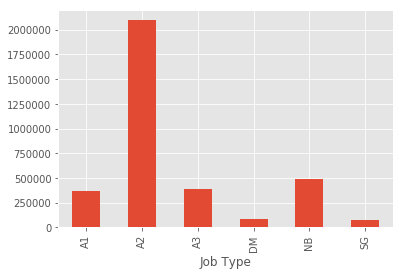

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
job_type.groupby(['Job Type']).size().plot(kind='bar')

81% are alternations, 14% are new buildings, others are demolition and sign.

Then we take borough into account, create a dataframe containing borough and job type information.

In [6]:
borough_type=df[['BOROUGH','Job Type']]
borough_type.groupby(['BOROUGH','Job Type']).size().unstack()

Job Type,A1,A2,A3,DM,NB,SG
BOROUGH,,,,,,
BRONX,25906,153041,36824,7799,64913,8012
BROOKLYN,117322,417599,86533,28992,148803,14685
MANHATTAN,78747,1129419,183920,10168,29578,30381
QUEENS,125861,332229,67338,30925,157012,17877
STATEN ISLAND,23621,62177,10167,12165,91462,4773


We give an unstacked bar plot to understand # permits for each type within every borough.

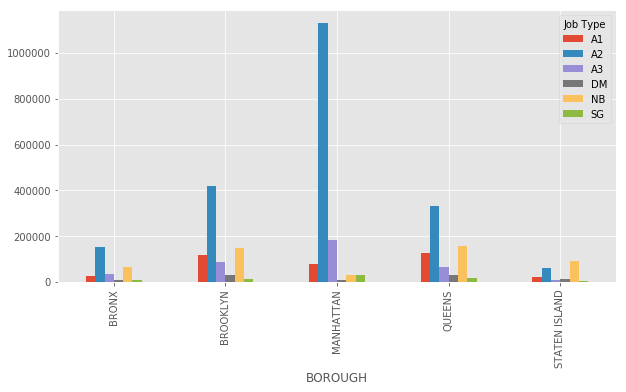

In [7]:
borough_type.groupby(['BOROUGH','Job Type']).size().unstack().plot(kind='bar',figsize=(10,5))

Then a stacked bar plot to compare between different boroughs.

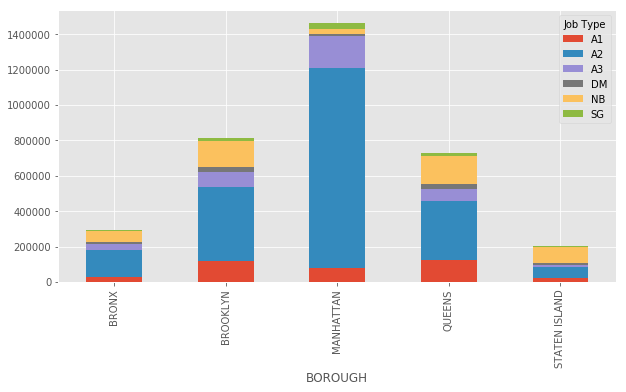

In [8]:
borough_type.groupby(['BOROUGH','Job Type']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,5))

Facts from the plot: 

Manhattan, majority of the work is here, almost all work are alternations.

Brooklyn and Queens ranks the second, but they have even more new buildings.

Bronx and Staten Island are next, with an even higher ratio of new buildings.

We can also change our point of view, group by job type to see the breakdown into 5 boroughs.

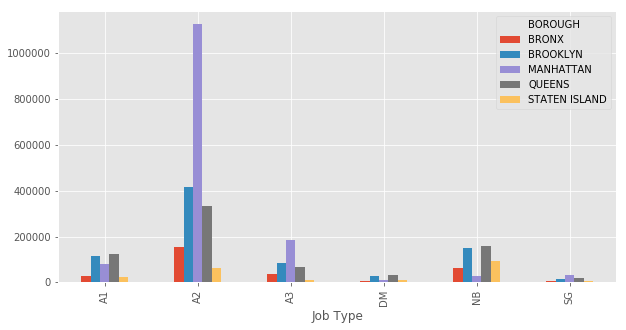

In [9]:
borough_type.groupby(['Job Type','BOROUGH']).size().unstack().plot(kind='bar',figsize=(10,5))

Facts from the plot:

Most medium to minor alternations happen in Manhattan.

Most major alternations, new buildings happen in Brooklyn, Queens, Staten Island.

This is intuitively reasonable because Manhattan is already full of buildings and the cost there does not allow too many demolitions and new buildings, while other districts still have room for development.

# Council District - Job Type

Is there any districts where constructions aggregate?

We create a district_type dataframe and group by districts. Because there are 51 districts, we use area plot this time.

In [10]:
district_type=df[['COUNCIL_DISTRICT','Job Type']]

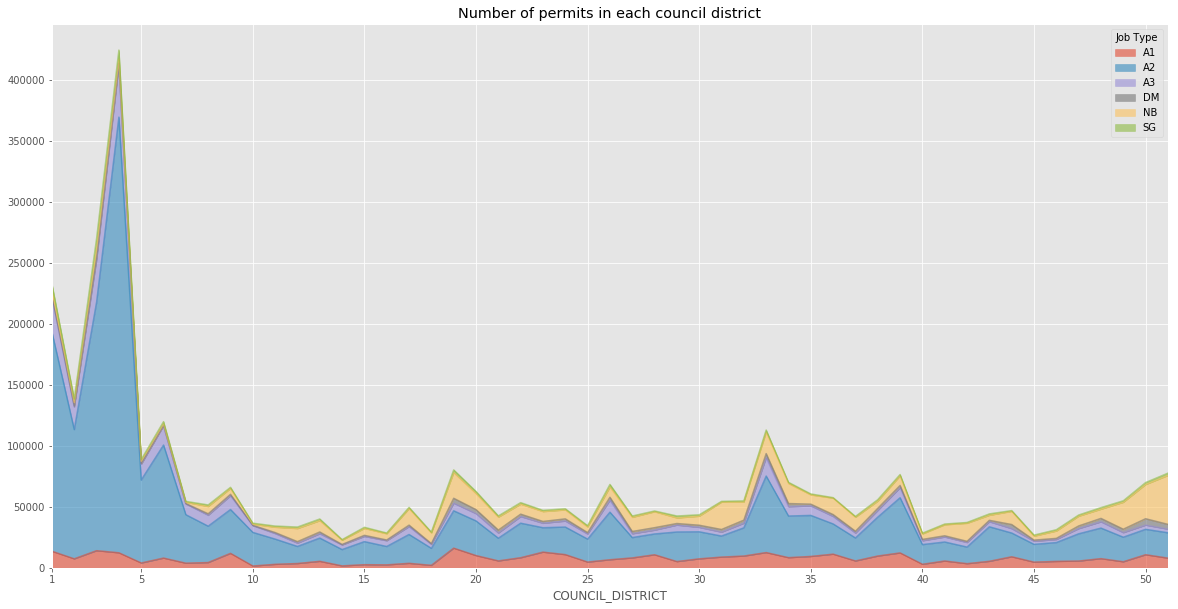

In [11]:
d1=district_type.groupby(['COUNCIL_DISTRICT','Job Type']).size().unstack()
d1.plot(kind='area',figsize=(20,10),
    title='Number of permits in each council district', xticks=[1,5, 10, 15, 20, 25, 30,35,40,45,50],alpha=0.6)

Council district: 1 - 10 Manhattan, 11 - 18 Bronx, 19 - 32 Queens, 33 - 48 Brooklyn, 49 - 51 Staten Island


The peaks of the plot correspond to districts with dense constructions within each borough.

"Popular places":

District 1-9 Lower and Downtown Manhattan, 

District 19-24,27 North East Queens,

District 26 Queens shore facing Manhatten, 

District 31-35 Downtown Brooklyn facing Manhattan, 

District 38,39,44 Brooklyn western edge,
 
District 51 South Shore of Staten Island.


Good, they really are with the "busiest" places in NYC. Intuitively, the busier the place is, the more renovation and alternation people need on the buildings. 

But when we say "busy", do we mean day-time or night-time? Day-time corresponds to business and commercial regions, while night-time corresponds to residential areas. So next let's take business type of the construction into account.


# Borough - Job Type - Business Type

## Within each borough

We focus on the three main business types: corporation, individual and partnership. For each borough we plot the breakdown of different jobs into these three business.

Manhattan:

In [12]:
borough_business=df[['BOROUGH','Job Type',"Owner's Business Type"]]

In [13]:
M=borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc['MANHATTAN']

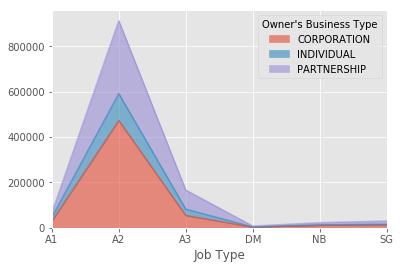

In [14]:
M[['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(kind='area',alpha=0.6)

Staten Island:

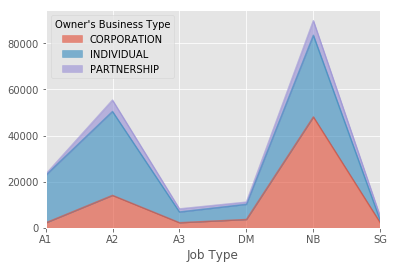

In [15]:
S=borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc['STATEN ISLAND']
S[['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(kind='area',alpha=0.6)

Queens:

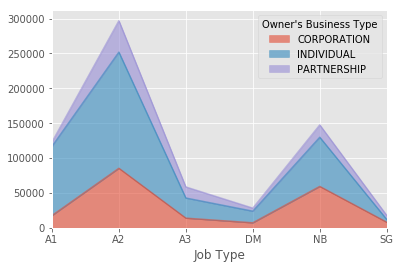

In [16]:
Q=borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc['QUEENS']
Q[['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(kind='area',alpha=0.6)

Brooklyn:

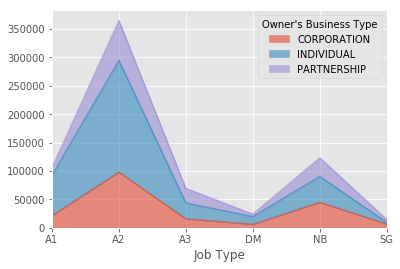

In [17]:
BK=borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc['BROOKLYN']
BK[['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(kind='area',alpha=0.6)

Bronx:

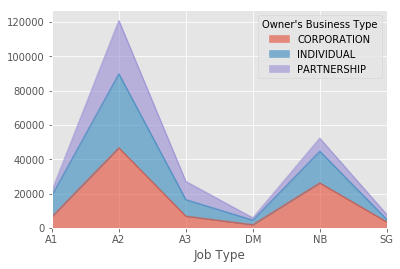

In [18]:
BX=borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc['BRONX']
BX[['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(kind='area',alpha=0.6)

We read the following from the plots:

Manhattan: most are alternations for corporation and partnership.

Brooklyn, Queens, Bronx: more alternation than new building, half corporation half individual.

Staten Island: more new buildings than alternations, new buildings are even among three types, alternations mostly for individual

## Five boroughs  together

We plot the 5 boroughs together to highlight the comparison.

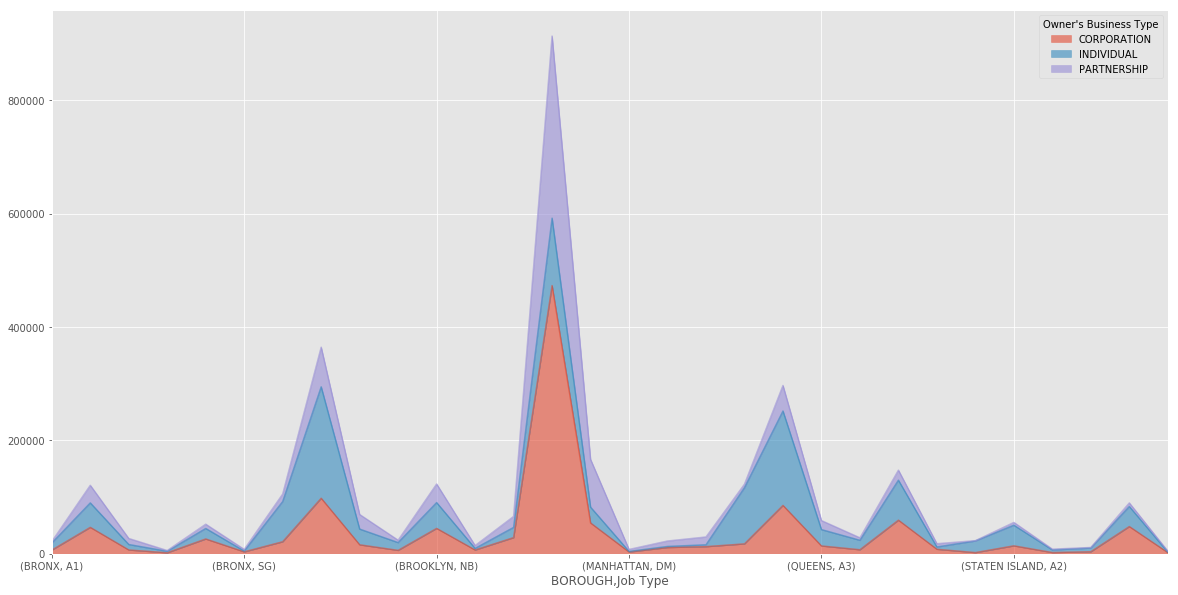

In [19]:
borough_business.groupby(['BOROUGH','Job Type',"Owner's Business Type"]).size().unstack().loc[:,['CORPORATION','INDIVIDUAL','PARTNERSHIP']].plot(
    kind='area',figsize=(20,10),alpha=0.6)

In order of the # of constructions:

Corporations, partnerhsip alternations in Manhattan,

Individual alternations in Brooklyn and Queens, 

Individual alternations in Brooklyn and Queens, 

New buildings in Queens for both individual and corporation,

Others.

Constructions in Manhattan are mostly for corporations and partnership, as this is where people work, and in Brooklyn and Queens individual constructions are more common, as most people reside there and have their own houses. Explainable!

# Café

As we are going towards relating popular construction locations with human activities, can we quantify human activities in a city using some data? And so that we can explore the correlation between the two datasets? 

Cafés saturate both commercial and residential areas. It's a good signal of population and activities in the neighboor. The map of cafés is also a map of human activities. So let's grab "Sidewalk_Caf__Licenses_and_Applications" dataset from New York Open Data, where can find the council district information of 1551 cafés in New York City not including Staten Island.

In [20]:
import pandas as pd
dfcafe=pd.read_csv('Sidewalk_Caf__Licenses_and_Applications.csv')

In [21]:
dfcafe.columns

Index(['LICENSE_NBR', 'LIC_STATUS', 'BUSINESS_NAME', 'BUSINESS_NAME2',
       'BUILDING', 'STREET', 'CITY', 'STATE', 'ZIP', 'SWC_TYPE', 'SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'DOHMH', 'LATITUDE', 'LONGITUDE',
       'COMMUNITY_DISTRICT', 'CITY_COUNCIL_DISTRICT', 'CD_URL', 'APP_ID',
       'APP_SWC_TYPE', 'APP_SQ_FT', 'APP_TABLES', 'APP_CHAIRS', 'APP_STATUS',
       'APP_STATUS_DATE', 'EXPIRATION_DATE', 'APP_TOO_DATE', 'SUBMIT_DATE',
       'INTAKE', 'INTAKE_DD', 'DPQA', 'SEND_PACKAGE_DD', 'CP', 'CP_DD', 'CB',
       'CB_DD', 'HEARING', 'HEARING_DD', 'HEARING_PUBLIC', 'HEARING_PUBLIC_DD',
       'CC', 'CC_DD', 'MOO', 'MOO_DD', 'ISSUANCE', 'ISSUANCE_DD'],
      dtype='object')

In [22]:
d2=dfcafe[['CITY_COUNCIL_DISTRICT','LIC_STATUS']].groupby(['CITY_COUNCIL_DISTRICT','LIC_STATUS']).size().unstack()
d2.fillna(0, inplace=True)
d2['cafes']=d2['Active']+d2['Inactive']
d2.drop(0,axis=0,inplace=True)
d2

LIC_STATUS,Active,Inactive,cafes
CITY_COUNCIL_DISTRICT,,,
1,140.0,38.0,178.0
2,124.0,35.0,159.0
3,205.0,57.0,262.0
4,102.0,13.0,115.0
5,86.0,21.0,107.0
6,122.0,26.0,148.0
7,38.0,20.0,58.0
8,4.0,1.0,5.0
9,32.0,5.0,37.0


We conduct a plot of # of cafes by council district.

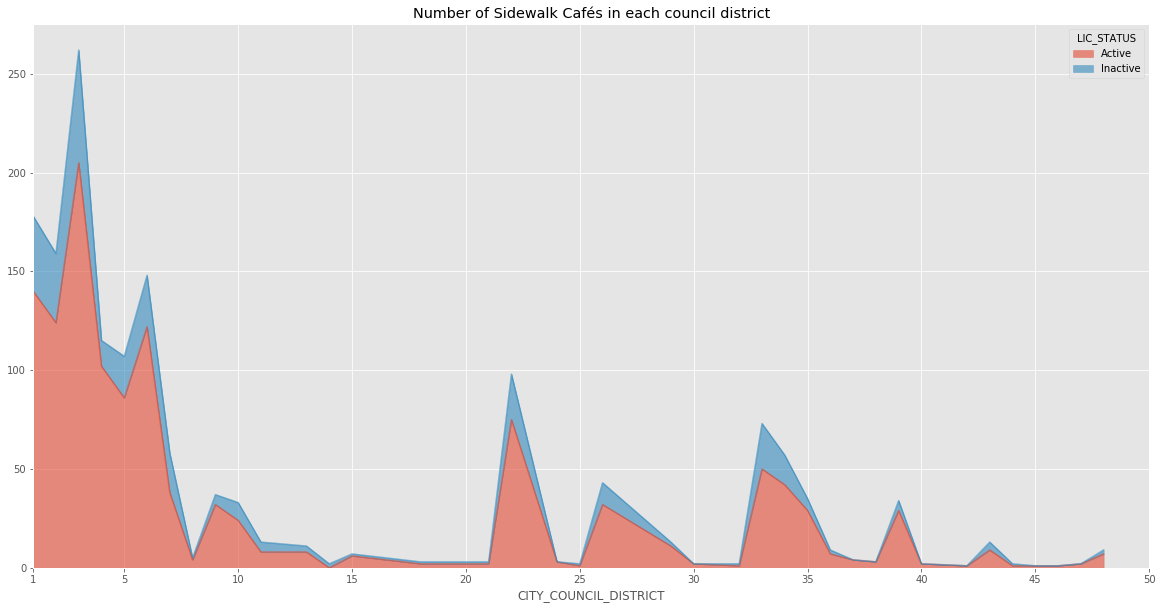

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
d2[['Active','Inactive']].plot(kind='area',figsize=(20,10),alpha=0.6,
                        title="Number of Sidewalk Cafés in each council district",
                                                                            xticks=[1,5, 10, 15, 20, 25, 30,35,40,45,50])

The peaks of the plot are where cafés are concentrated, and thus are where human activities concentrate.

Popular places:

District 1-7 Lower and Downtown Manhattan, 

District 22-24,27 North East Queens,

District 26 Queens shore facing Manhatten, 

District 33-35 Downtown Brooklyn facing Manhattan, 

District 38,39,43 Brooklyn western edge.

See how much they overlap with popular construction places!  

"District 1-9 Lower and Downtown Manhattan,

District 19-24,27 North East Queens,

District 26 Queens shore facing Manhatten,

District 31-35 Downtown Brooklyn facing Manhattan,

District 38,39,44 Brooklyn western edge,

District 51 South Shore of Staten Island."

Good but we want some statistics to convince us the correlation.

# Construction activities - Café  

We join the two dataframes together on same council district. 

Pairplot to discover correlation in the data. 

We are mostly interested in the correlation between "# of permits" and "# of cafés", which is the plot below with 4 subplots.

In [24]:
d1['permits']=d1['A1']+d1['A2']+d1['A3']+d1['DM']+d1['NB']+d1['SG']

In [25]:
d12=pd.concat([d1,d2],join='outer',axis=1)

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/beingcshen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


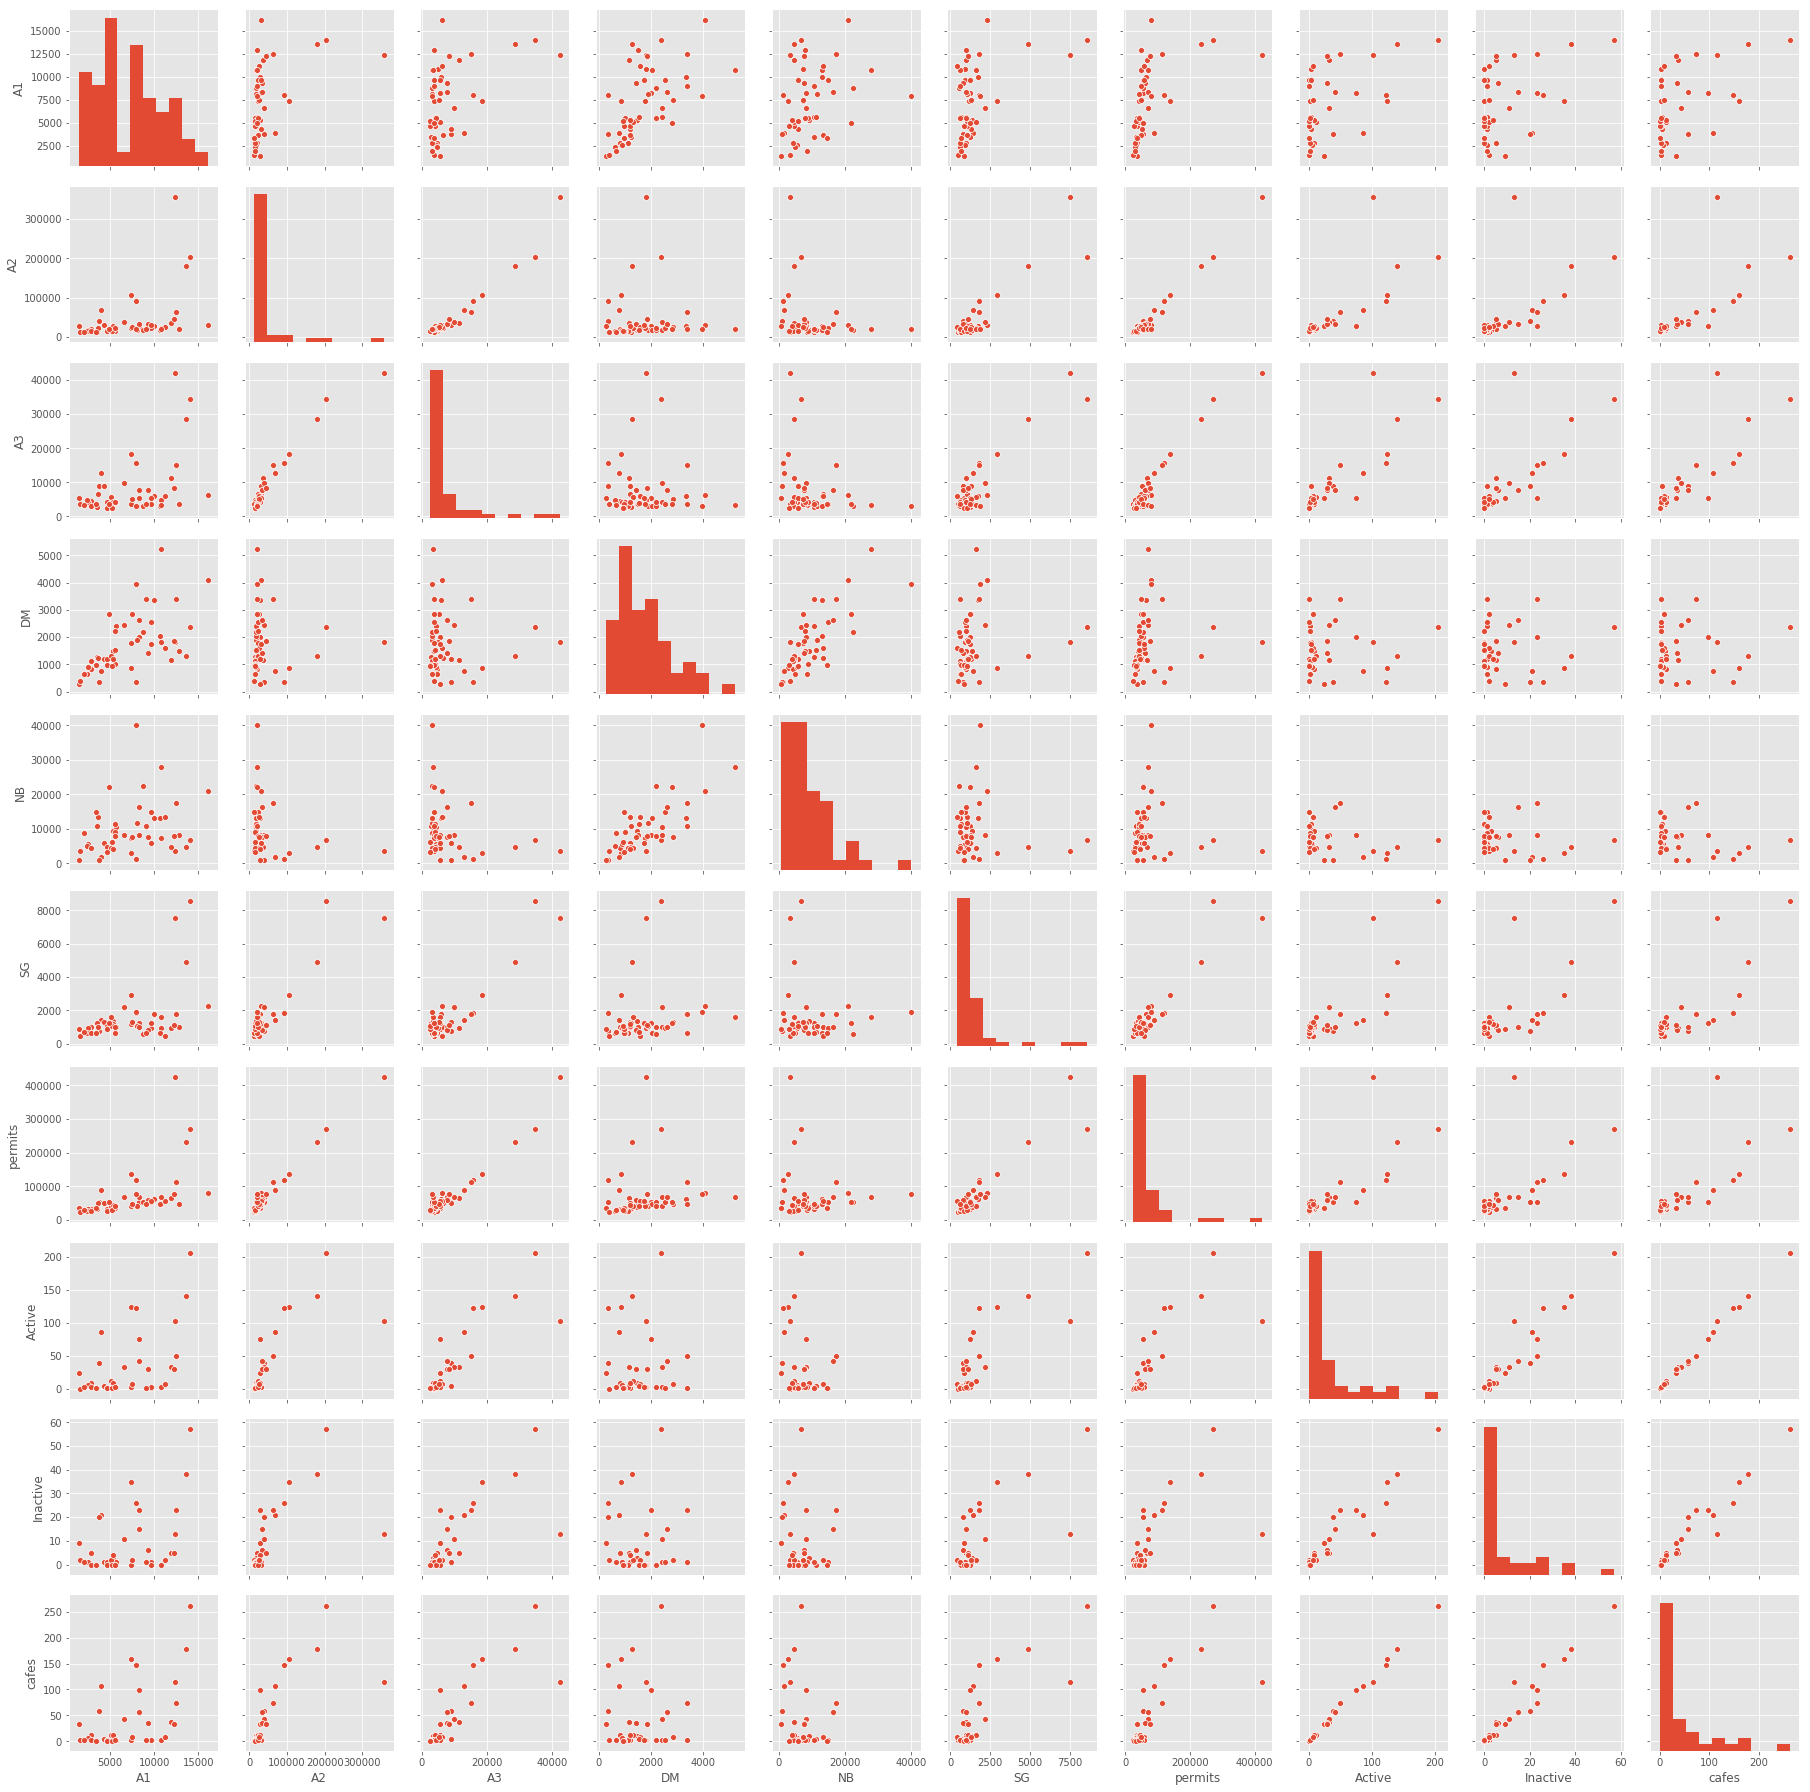

In [26]:
import seaborn as sns
sns.pairplot(d12)

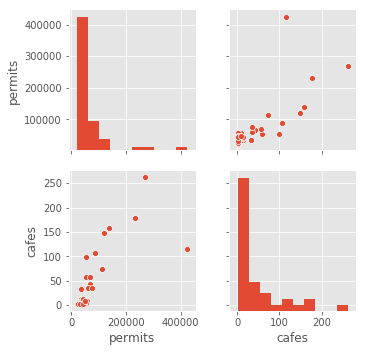

In [27]:
sns.pairplot(d12,vars=['permits','cafes'])

The result is not very convincing at first glance, but hang on!

In fact there is only one out-lier at about permits=424469, cafes=115, which is council district 4 midtown Manhattan. According to Wikipedia, it's the central business district with highest rents, having many vacant storefronts. Maybe the rent is playing a disturbing role in the dynamic, resulting in too few cafés relative to the # of constructions. Thus we exclude district 4 as an outlier.

The rest of the points seem to locate along a line. Let's apply a linear regression model!

District 49,50,51 have no café info, so we drop them as well.

In [28]:
X=d12[['cafes']]
y=d12[['permits']]
X.drop([4, 49, 50, 51],axis=0, inplace=True)
y.drop([4, 49, 50, 51],axis=0, inplace=True)

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
X.fillna(0, inplace=True)

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
print('intercept:',lm.intercept_)
print('coefficient:', lm.coef_)


intercept: [37668.93554784]
coefficient: [[765.62441063]]


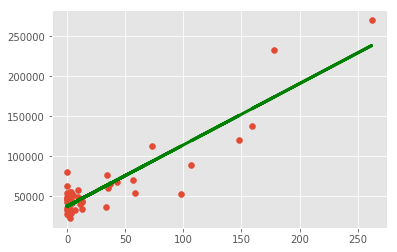

In [31]:
predictions = lm.predict(X)
plt.scatter(X,y)
plt.plot(X, predictions, color='green', linewidth=3)
plt.show()

The green line is the modeling the relation between the x-axis: # of cafés and y-axis # of constructions.

MSE: 375038852.4146758


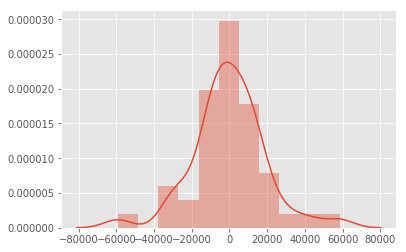

In [32]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, predictions))
sns.distplot(y-predictions)

The error follows a fairly good normal distribution, indicating the linear relation is true! Construction activities follow the same geographic pattern as cafés.

# Conclusion

To understand the geography of constructions in NYC, our investigation went through three stages. 

We first only considered borough. By some data analysis and visualization, we found most alternation works are in Manhattan, while new buildings arise in Brooklyn and Queens.

Then we narrowed location information to council districts and achieved a list of districts where constructions aggregate. Also we introduced business types into the analysis, we found most business constructions are in Manhattan, where people work, and individual works are in Brooklyn and Queens, where people reside. The findings here directed us to the idea that construction activities follow human activities in the city.

In the last but main step, the café data was introduced, as a quantification of human activity in the city. We derived another list of districts with more cafés. This list coincides the list for construction activities as we expect. Finally, by setting up a linear regression and validating the model, we are convinced that the geographical correlation between cafés and construction activities does exist, leading us to the final conclusion that construction activities geographically follow human activities in the city.